# scikit learn

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(666)
X = np.random.normal(0, 1, size=(200, 2))
y = np.array(X[:, 0] ** 2 + X[:, 1] < 1.5, dtype="int")

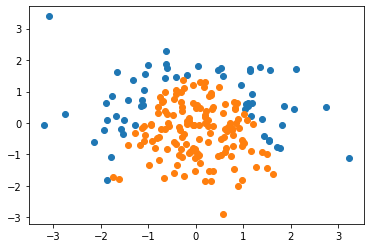

In [3]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [5]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [7]:
log_reg.score(X_train, y_train)

0.76

In [8]:
log_reg.score(X_test, y_test)

0.78

In [9]:
def plot_desicion_boundry(model, axis):
    # axis 横纵坐标轴的范围
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0])* 100)).reshape(1, -1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100)).reshape(1, -1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(["#ED9A9A","#FFF59D", "#90CAF9"])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

/home/lin/software/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


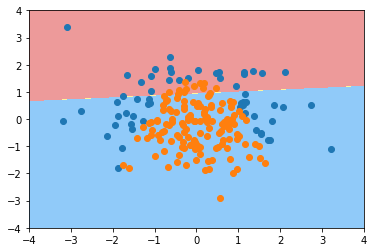

In [10]:
plot_desicion_boundry(log_reg, [-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
def PolynomialLogisticRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("log_reg", LogisticRegression())   # 自己实现的类，但是可以无缝衔接到sklearn的pipeline。是因为自己在编写时也遵循了sklearn 的标准。init fit predict score ...
    ])

In [15]:
poly_log_reg = PolynomialLogisticRegression(2)
poly_log_reg.fit(X_train, y_train)
poly_log_reg.score(X_train, y_train)

0.98

In [13]:
poly_log_reg.score(X_test, y_test)

0.96

/home/lin/software/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


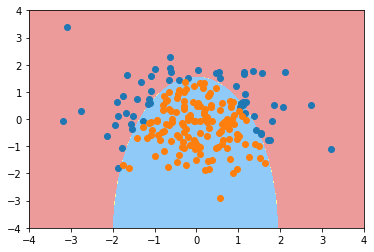

In [14]:
plot_desicion_boundry(poly_log_reg, [-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [18]:
poly_log_reg2 = PolynomialLogisticRegression(20)
poly_log_reg2.fit(X_train, y_train)
poly_log_reg2.score(X_train, y_train)

0.9733333333333334

In [17]:
poly_log_reg2.score(X_test, y_test)

0.96

/home/lin/software/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


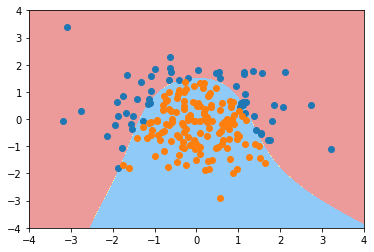

In [23]:
plot_desicion_boundry(poly_log_reg2, [-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
def PolynomialLogisticRegression(degree, C):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("log_reg", LogisticRegression(C=C))   # 自己实现的类，但是可以无缝衔接到sklearn的pipeline。是因为自己在编写时也遵循了sklearn 的标准。init fit predict score ...
    ])

In [22]:
poly_log_reg3 = PolynomialLogisticRegression(20, 0.1)
poly_log_reg3.fit(X_train, y_train)
poly_log_reg3.score(X_train, y_train)

0.8666666666666667

In [24]:
poly_log_reg3.score(X_test, y_test)

0.92

/home/lin/software/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


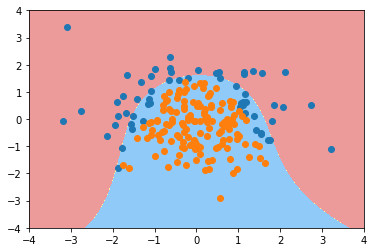

In [25]:
plot_desicion_boundry(poly_log_reg3, [-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
def PolynomialLogisticRegression(degree, C, penalty='l2'):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("log_reg", LogisticRegression(C=C, penalty=penalty))   # 自己实现的类，但是可以无缝衔接到sklearn的pipeline。是因为自己在编写时也遵循了sklearn 的标准。init fit predict score ...
    ])

In [30]:
poly_log_reg4 = PolynomialLogisticRegression(20, 0.1, "none")
poly_log_reg4.fit(X_train, y_train)
poly_log_reg4.score(X_train, y_train)

/home/lin/software/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


1.0

In [31]:
poly_log_reg4.score(X_test, y_test)

1.0

/home/lin/software/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


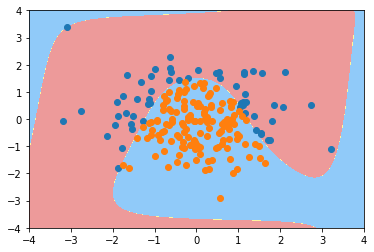

In [32]:
plot_desicion_boundry(poly_log_reg4, [-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()